# Лабораторна робота № 3

## Тема: Синтез рекурсивного цифрового фільтра.

## Мета: навчитися проводити аналіз та синтез рекурсивного цифрового фільтра.

*Зробив: Савченко Андрій*

*Виконав: 08.10.2024*

## ВАРІАНТ ЗАВДАНЬ 22

### Умовні позначення:
### СФ – смуговий фільтр.

<img src="Laba3_22.png">

## Порядок виконання лабораторної роботи № 3

### 1. Побудувати графік заданого аналогового вхідного сигналу x(t).

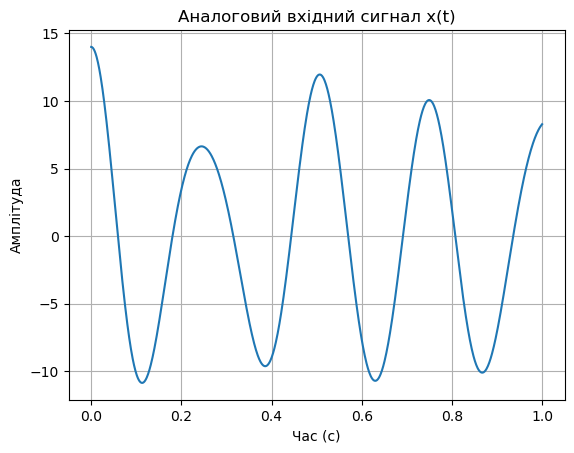

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Визначення часу і вхідного сигналу x(t)
t = np.linspace(0, 1, 1000)  # Час від 0 до 1 секунди
x_t = np.cos(12 * t) + 10 * np.cos(25 * t) + 2 * np.cos(35 * t) + np.cos(40 * t)

# Побудуваня графіку вхідного сигналу
plt.plot(t, x_t)
plt.title('Аналоговий вхідний сигнал x(t)')
plt.xlabel('Час (с)')
plt.ylabel('Амплітуда')
plt.grid(True)
plt.show()

### 2. Установити необхідні граничні частоти фільтра (f_g, f_(g_low), f_(g_high), частоту Найквіста для аналогового сигналу (f_a), часовий інтервал Найквіста (T_a) (див. допоміжні файли ІIR_filters.mcd та ІIR_filters.xls).

In [2]:
# Задані параметри
f_g_low = 15  # Нижня гранична частота в рад/с
f_g_high = 30  # Верхня гранична частота в рад/с
f_g = (f_g_high + f_g_low) / 2  # Центральна частота смуги пропускання
f_a = 4 * f_g  # Частота Найквіста
T_a = 1 / (2 * f_a)  # Інтервал часу Найквіста

print(f"f_g: {f_g}, f_g_low: {f_g_low}, f_g_high: {f_g_high}, f_a: {f_a}, T_a: {T_a}")

f_g: 22.5, f_g_low: 15, f_g_high: 30, f_a: 90.0, T_a: 0.005555555555555556


### 3.Користуючись пунктами 1–5 розділу «Короткі теоретичні відомості»,обчислити коефіцієнти a_k та b_k шуканого фільтра.

In [3]:
from scipy.signal import bessel, zpk2tf

# Порядок фільтра
N = 2

# Смуговий фільтр на основі прототипу Бесселя
z, p, k = bessel(N, [f_g_low / (f_a * np.pi), f_g_high / (f_a * np.pi)], btype='band', analog=False, output='zpk')
b, a = zpk2tf(z, p, k)

# Коефіцієнти фільтра
print("a_k коефіцієнти: ", a)
print("b_k коефіцієнти: ", b)

a_k коефіцієнти:  [ 1.         -3.62130396  5.00795707 -3.13274128  0.74875579]
b_k коефіцієнти:  [ 0.00605803  0.         -0.01211605  0.          0.00605803]


### 4. Узявши z=e^(j*ω*T_α ) і скориставшись формулою (3) розділу «Короткі теоретичні відомості», побудувати графік передаточної функції G(z) шуканого фільтра.

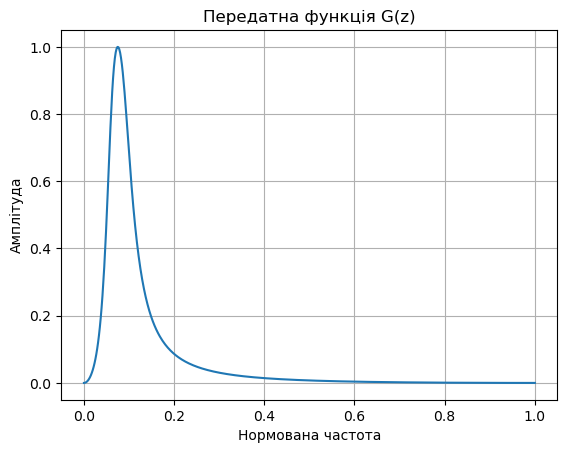

In [5]:
from scipy.signal import freqz

# Діапазон частот для побудови
omega = np.linspace(0, np.pi, 512)
w, h = freqz(b, a, worN=omega)

# Передаточна функція
plt.plot(w / np.pi, np.abs(h))
plt.title('Передатна функція G(z)')
plt.xlabel('Нормована частота')
plt.ylabel('Амплітуда')
plt.grid(True)
plt.show()

### 5. На основі різницевого рівняння (4) (розділ «Короткі теоретичні відомості») знайти дискретну послідовність y[n] фільтрованого сигналу. При цьому слід пам'ятати про те, що y[n] = 0 для всіх n∈[0, N −1] , де N – порядок фільтра.

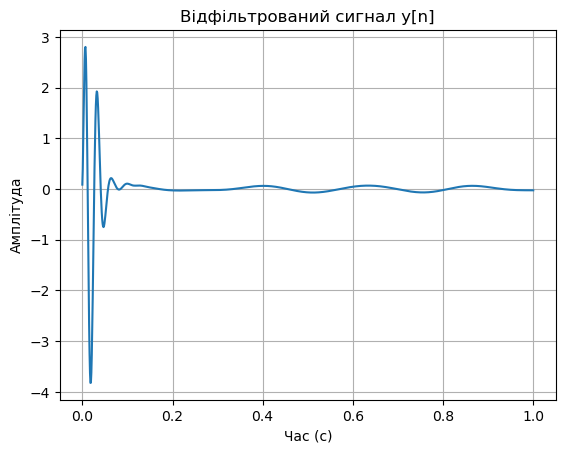

In [6]:
from scipy.signal import lfilter

# Фільтруйте вхідний сигнал за допомогою розрахованих коефіцієнтів
y_n = lfilter(b, a, x_t)

# Побудування графіку дискретної послідовності y[n]
plt.plot(t, y_n)
plt.title('Відфільтрований сигнал y[n]')
plt.xlabel('Час (с)')
plt.ylabel('Амплітуда')
plt.grid(True)
plt.show()

### 6.Відновити за формулою (5) (розділ «Короткі теоретичні відомості») аналоговий фільтрований сигнал y(t) з дискретної послідовності y[n], отриманої в п. 5, побудувати на одній площині графіки аналогового вхідного сигналу x(t) та відновленого фільтрованого сигналу y(t).

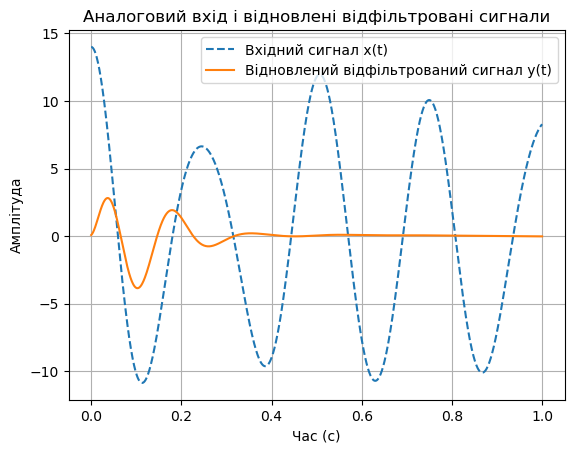

In [8]:
# Функція відновлення Котельникова
def kotelnikov_restore(y_n, T, t):
    restored_signal = np.zeros_like(t)
    for n, y in enumerate(y_n):
        restored_signal += y * np.sinc((t - n * T) / T)
    return restored_signal

# Відновлення аналогового сигналу
restored_y_t = kotelnikov_restore(y_n, T_a, t)

# Побудування разом вхідний і відновлений сигнали
plt.plot(t, x_t, label='Вхідний сигнал x(t)', linestyle='--')
plt.plot(t, restored_y_t, label='Відновлений відфільтрований сигнал y(t)')
plt.title('Аналоговий вхід і відновлені відфільтровані сигнали')
plt.xlabel('Час (с)')
plt.ylabel('Амплітуда')
plt.grid(True)
plt.legend()
plt.show()